<a href="https://colab.research.google.com/github/Harhsa/Harhsa/blob/main/Hourly_activity_merged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Hourly activity merged**

#Load and Inspect the Datasets

In [1]:
import pandas as pd

# Load the datasets
df_calories = pd.read_csv('hourlyCalories_merged.csv')
df_intensities = pd.read_csv('hourlyIntensities_merged.csv')
df_steps = pd.read_csv('hourlySteps_merged.csv')

# Inspect the first few rows of each dataset
df_calories.head(), df_intensities.head(), df_steps.head()


(           Id           ActivityHour  Calories
 0  1503960366  4/12/2016 12:00:00 AM        81
 1  1503960366   4/12/2016 1:00:00 AM        61
 2  1503960366   4/12/2016 2:00:00 AM        59
 3  1503960366   4/12/2016 3:00:00 AM        47
 4  1503960366   4/12/2016 4:00:00 AM        48,
            Id           ActivityHour  TotalIntensity  AverageIntensity
 0  1503960366  4/12/2016 12:00:00 AM              20          0.333333
 1  1503960366   4/12/2016 1:00:00 AM               8          0.133333
 2  1503960366   4/12/2016 2:00:00 AM               7          0.116667
 3  1503960366   4/12/2016 3:00:00 AM               0          0.000000
 4  1503960366   4/12/2016 4:00:00 AM               0          0.000000,
            Id           ActivityHour  StepTotal
 0  1503960366  4/12/2016 12:00:00 AM        373
 1  1503960366   4/12/2016 1:00:00 AM        160
 2  1503960366   4/12/2016 2:00:00 AM        151
 3  1503960366   4/12/2016 3:00:00 AM          0
 4  1503960366   4/12/2016 4:00:0

#Check the structure and data types:

In [2]:
df_calories.info()
df_intensities.info()
df_steps.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        -------

# Data Cleaning

In [3]:
df_calories['ActivityHour'] = pd.to_datetime(df_calories['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
df_intensities['ActivityHour'] = pd.to_datetime(df_intensities['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
df_steps['ActivityHour'] = pd.to_datetime(df_steps['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')


Check for Duplicates and Remove Them

In [4]:
df_calories.drop_duplicates(inplace=True)
df_intensities.drop_duplicates(inplace=True)
df_steps.drop_duplicates(inplace=True)


Check for Missing Values:

In [5]:
df_calories.isnull().sum(), df_intensities.isnull().sum(), df_steps.isnull().sum()


(Id              0
 ActivityHour    0
 Calories        0
 dtype: int64,
 Id                  0
 ActivityHour        0
 TotalIntensity      0
 AverageIntensity    0
 dtype: int64,
 Id              0
 ActivityHour    0
 StepTotal       0
 dtype: int64)

#Merge the Datasets

In [6]:
df_merged = pd.merge(df_calories, df_intensities, on=['Id', 'ActivityHour'])
df_merged = pd.merge(df_merged, df_steps, on=['Id', 'ActivityHour'])


Inspect the merged dataset:

In [7]:
df_merged.head()
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   ActivityHour      22099 non-null  datetime64[ns]
 2   Calories          22099 non-null  int64         
 3   TotalIntensity    22099 non-null  int64         
 4   AverageIntensity  22099 non-null  float64       
 5   StepTotal         22099 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.0 MB


# Exploratory Data Analysis

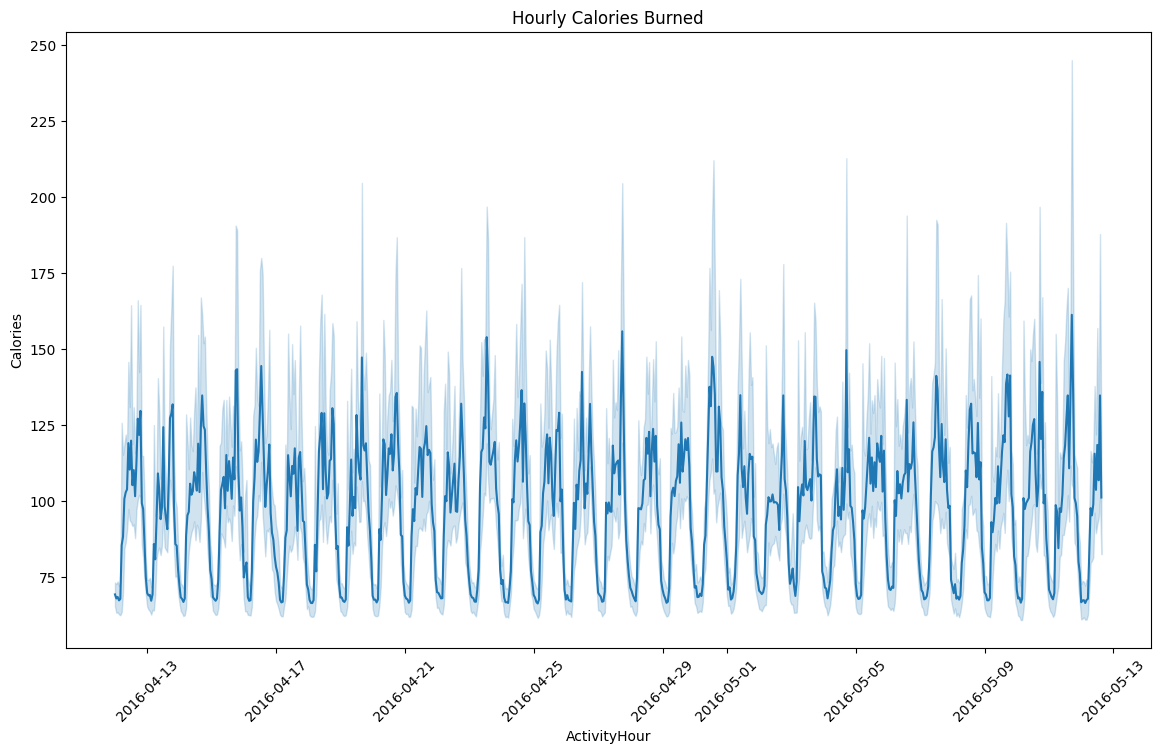

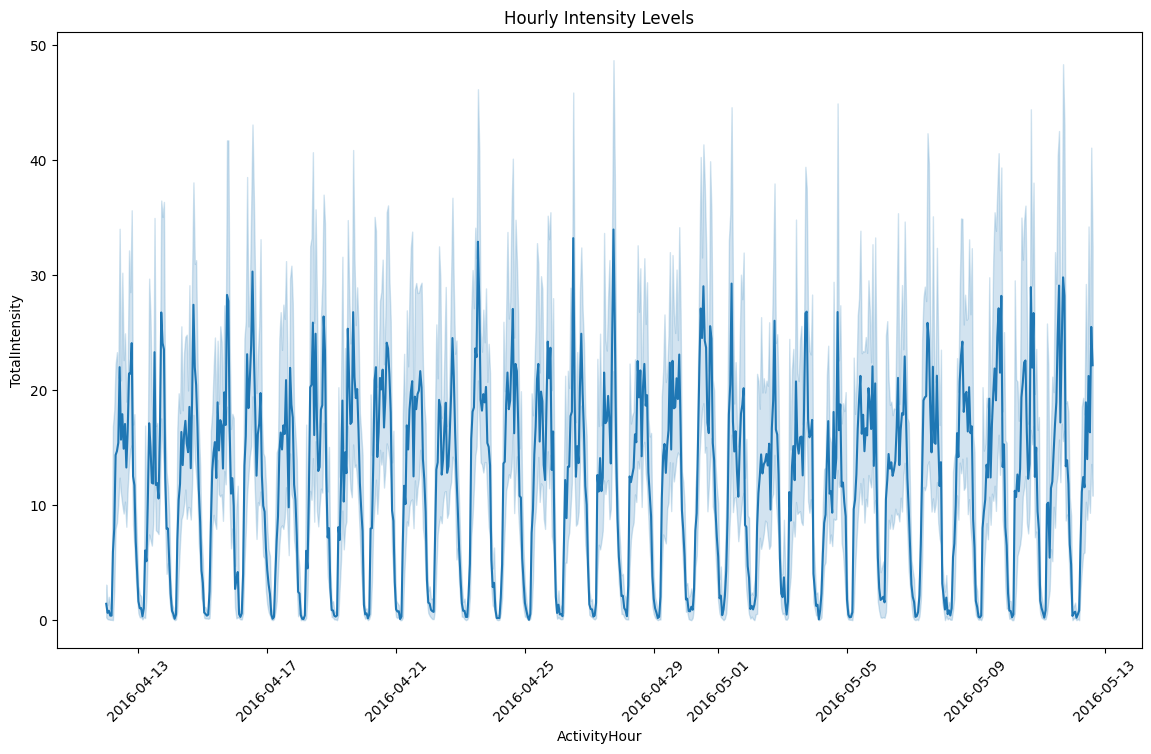

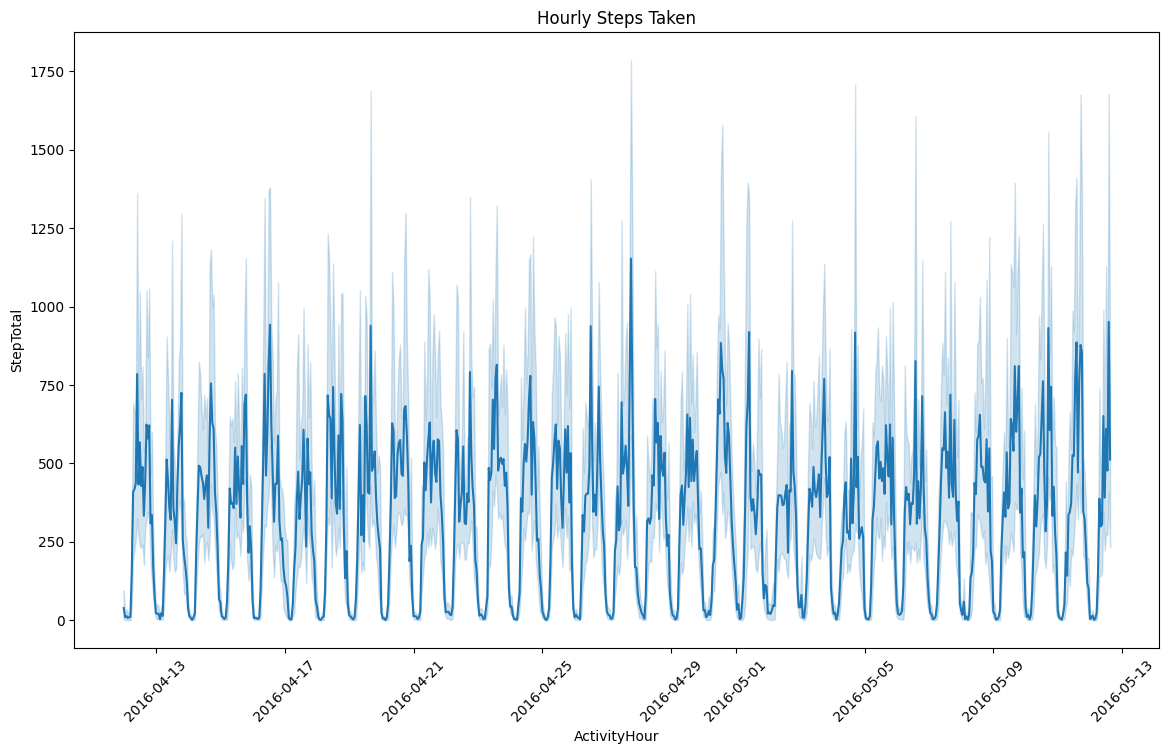

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.lineplot(x='ActivityHour', y='Calories', data=df_merged)
plt.title('Hourly Calories Burned')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='ActivityHour', y='TotalIntensity', data=df_merged)
plt.title('Hourly Intensity Levels')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='ActivityHour', y='StepTotal', data=df_merged)
plt.title('Hourly Steps Taken')
plt.xticks(rotation=45)
plt.show()


Correlation Matrix:

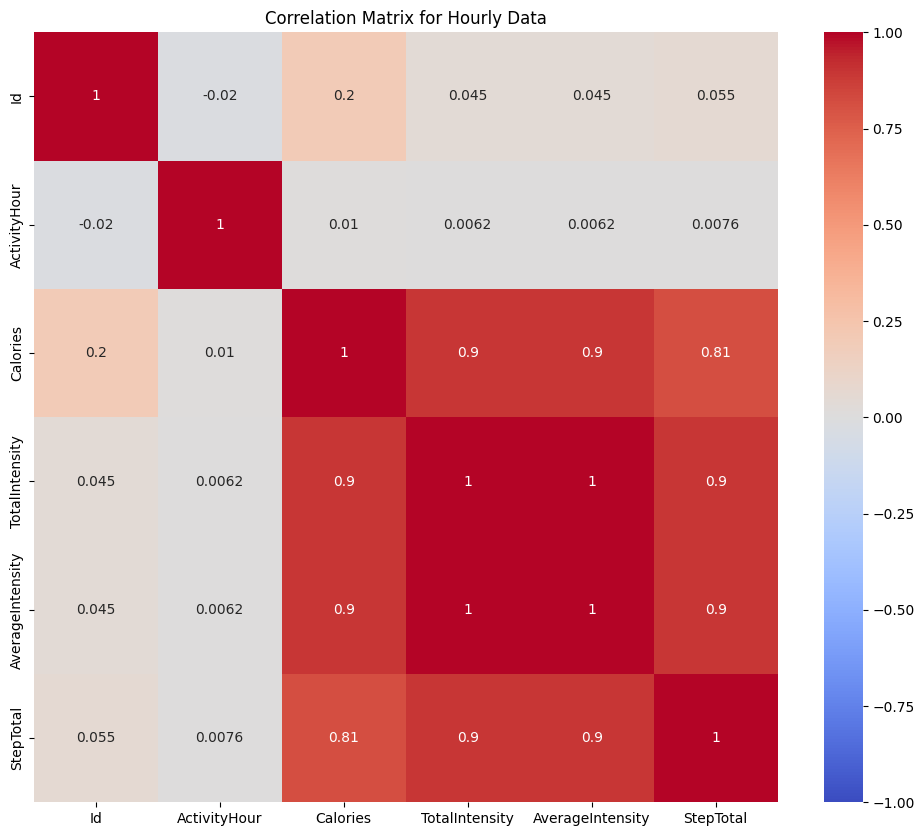

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_merged.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Hourly Data')
plt.show()


#Data Export for Tableau

In [10]:
df_merged.to_csv('cleaned_hourlyActivity.csv', index=False)
